In [1]:
from numpy import *
from matplotlib.pyplot import *

from crnpy.colors import cyan,yellow
from scipy.ndimage.filters import gaussian_filter
from scipy.ndimage import zoom

%matplotlib inline

In [8]:
moving = genfromtxt('c6-10-c12-40.csv',dtype=float,delimiter=',').reshape(97,2,20)
stationary = genfromtxt('c6-125-c12-40.csv',dtype=float,delimiter=',').reshape(97,2,20)

moving = transpose(moving.reshape(97,2,20),axes=(0,2,1))
stationary = transpose(stationary.reshape(97,2,20),axes=(0,2,1))

moving = gradient(moving,axis=0)
stationary = gradient(stationary,axis=0)

# moving[moving < 0] = 0
# stationary[stationary < 0] = 0

ntime,nspace,_ = moving.shape
space = linspace(0,5,nspace)
time = linspace(0,48,ntime)

space,time = meshgrid(space,time)

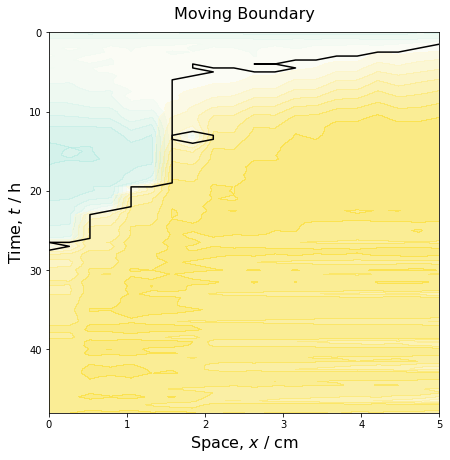

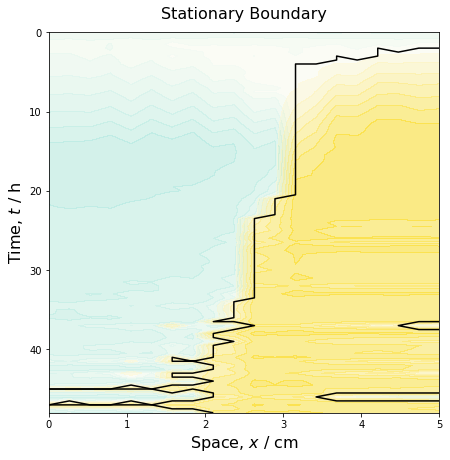

In [9]:
figure(figsize=(7,7))
title('Moving Boundary',fontsize=16,y=1.02)

m = (moving[:,:,0]-moving[:,:,1])
m[m<0] = 0
contourf(space,time,log10(m+1),cmap='cyan',alpha=0.5)

contour(space,time,log10(m+1),levels=[0.0],colors=['k'])

m = (moving[:,:,0]-moving[:,:,1])
m[m>0] = 0
m*=-1
contourf(space,time,log10(m+5),cmap='yellow',alpha=0.5)

gca().invert_yaxis()
xlabel(r'Space, $x$ / cm',fontsize=16)
ylabel(r'Time, $t$ / h',fontsize=16);


figure(figsize=(7,7))
title('Stationary Boundary',fontsize=16,y=1.02)

s = (stationary[:,:,0])-(stationary[:,:,1])
s[s<0] = 0
contourf(space,time,log10(s+1),cmap='cyan',alpha=0.5,origin='upper')

contour(space,time,log10(s+1),levels=[0.0],colors=['k'])

s = (stationary[:,:,0])-(stationary[:,:,1])
s[s>0] = 0; s*=-1
contourf(space,time,log10(s+5),cmap='yellow',alpha=0.5,origin='upper')


gca().invert_yaxis()
xlabel(r'Space, $x$ / cm',fontsize=16)
ylabel(r'Time, $t$ / h',fontsize=16);

In [496]:
C6,C12,ATC,IPTG,CFP,YFP = genfromtxt('proc_R33S175ExrepTet33AAVLac300ND_IPTGATC_titration.csv',
                                     delimiter=',',dtype=float,skip_header=1).T

ratio = (CFP-YFP)/(CFP+YFP)
derepressor_ratio = -(ATC-IPTG)/(ATC+IPTG)
sort_index = argsort(derepressor_ratio)

ratio = ratio[sort_index]
derepressor_ratio = derepressor_ratio[sort_index]

YFP = YFP[sort_index]; CFP = CFP[sort_index];
C6 = C6[sort_index]; C12 = C12[sort_index]
ATC = ATC[sort_index]; IPTG = IPTG[sort_index]

# YFP = YFP[:25]
# C12 = C12[:25]
# ATC = ATC[:25]

# sort_index = argsort(C12)

# YFP = YFP[sort_index]
# C12 = C12[sort_index]
# ATC = ATC[sort_index]

ratio = ratio.reshape(-1,5)
derepressor_ratio = derepressor_ratio.reshape(-1,5)

YFP = YFP.reshape(-1,5); CFP = CFP.reshape(-1,5)
C6 = C6.reshape(-1,5); C12 = C12.reshape(-1,5)
ATC = ATC.reshape(-1,5); IPTG = IPTG.reshape(-1,5)

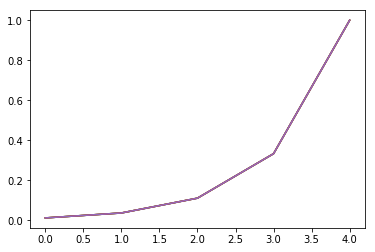

In [500]:
plot(IPTG[:5])

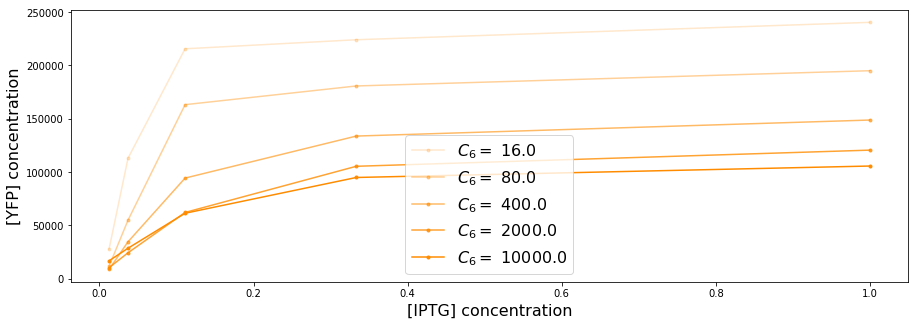

In [502]:
figure(figsize=(15,5))

yfp = array([ yfp[argsort(c6)] for c6,yfp in zip(C6[:5],YFP[:5]) ])
cfp = array([ cfp[argsort(c6)] for c6,cfp in zip(C6[:5],CFP[:5]) ])

# plot(ATC[:5],yfp,'.-')
alpha = 0.2
i = 0
c6 = unique(C6[:5])

for a,y,c in zip(IPTG[:5].T,yfp.T,cfp.T) :

    plot(a,y,'.-',color='darkorange',alpha=alpha,label=r'$C_{6}=$ '+str(c6[i]))
    alpha += 0.2
    i += 1


xlabel('[IPTG] concentration',fontsize=16)
ylabel('[YFP] concentration',fontsize=16)
legend(fontsize=16);

In [449]:
ATC[:5].T.shape

(5, 5)

In [456]:
c12[0]

16.0

In [411]:
YFP[:5]

array([[111987., 181510., 200984., 218227., 181417.],
       [110770., 200499., 224376., 182343., 204572.],
       [ 50230., 192472., 220119., 167960., 197860.],
       [163885., 118154., 204730.,  38062., 155736.],
       [ 84159., 120884., 197764.,  33263., 137860.]])

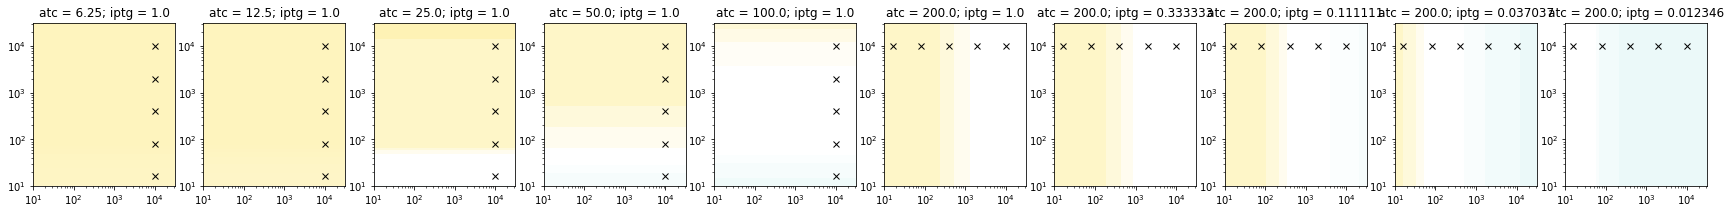

In [426]:
from scipy.interpolate import griddata


f, ax_arr = subplots(1,10, figsize=(30,3))
xx = logspace(1,4.5,5)
grid_x, grid_y = meshgrid(xx,xx)

i = 0
for c6,c12,r,atc,iptg in zip(C6,C12,ratio,ATC,IPTG) :

    points = array([c6,c12]).T
    values = r


    grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')

    ax_arr[i].set_title('atc = {}; iptg = {}'.format(mean(atc),mean(iptg)))
    ax_arr[i].plot(*points.T,'kx')
    
    zz = array(grid_z0)
    zz[zz<0] = 0
    ax_arr[i].contourf(grid_x,grid_y,log(zz+0.1),cmap='cyan',vmin=-1,vmax=1,alpha=0.5)
    
    zz = array(grid_z0)
    zz[zz>0] = 0; zz *= -1
    ax_arr[i].contourf(grid_x,grid_y,log(zz+0.1),cmap='yellow',vmin=-1,vmax=1,alpha=0.5)

    ax_arr[i].set_xscale('log')
    ax_arr[i].set_yscale('log')
    i += 1

Text(0.5, 0, 'image number')

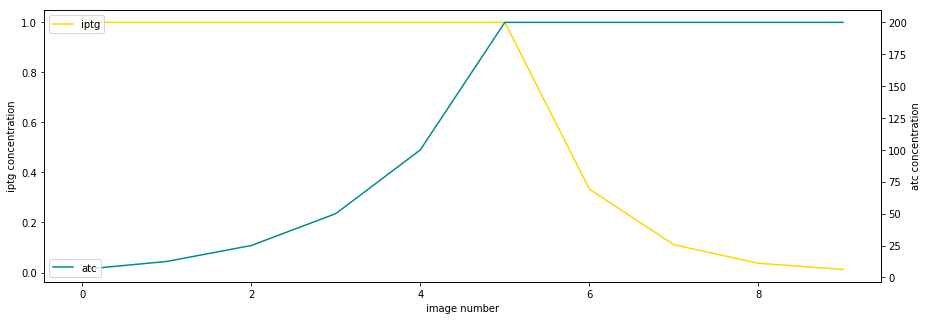

In [387]:
fig, ax1 = subplots(figsize=(15,5))
ax2 = ax1.twinx()

ax1.plot(IPTG.T[0],'gold',label='iptg')
ax1.legend(loc=2)
ax1.set_ylabel('iptg concentration')
ax2.plot(ATC.T[0],'darkcyan',label='atc')
ax2.legend(loc=3)
ax2.set_ylabel('atc concentration')
ax1.set_xlabel('image number')


In [326]:
ratio

array([[-0.80149123, -0.90598699, -0.91283079, -0.91854659, -0.9031319 ],
       [-0.7653715 , -0.90774281, -0.91745679, -0.90032672, -0.91101271],
       [ 0.27522221, -0.89820212, -0.91051474, -0.88965393, -0.89421282],
       [-0.69050333, -0.3963388 , -0.84075777,  0.49786942, -0.66470874],
       [ 0.12918997, -0.1243559 , -0.63114419,  0.55780224, -0.29048564],
       [-0.77748004, -0.88406933,  0.24673805, -0.42401233, -0.046823  ],
       [ 0.02564008, -0.36369525, -0.75622391,  0.27356449, -0.87561835],
       [ 0.42879925, -0.8692887 , -0.13176302, -0.70093828,  0.3050039 ],
       [ 0.38382014,  0.63109672, -0.71598002,  0.66606565, -0.17608009],
       [ 0.7922462 ,  0.82597175,  0.58433558, -0.06924656,  0.80378681]])